In [4]:
%pip install ultralytics split-folders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import splitfolders
import os

# 1. Your current dataset path
input_folder = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

# 2. Where to save the new YOLO dataset
output_folder = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO"

print(f"🔄 Converting dataset for YOLO...")
print(f"   Input: {input_folder}")
print(f"   Output: {output_folder}")

# 3. Split the data (80% Train, 20% Validation)
try:
    # This automatically copies images into 'train' and 'val' folders
    splitfolders.ratio(input_folder, output=output_folder, 
                       seed=1337, ratio=(0.8, 0.2), group_prefix=None, move=False)
    print("✅ Success! Dataset prepared for YOLO.")
    print(f"   You can now train using: {output_folder}")
except Exception as e:
    print(f"❌ Error: {e}")

🔄 Converting dataset for YOLO...
   Input: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset
   Output: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO
✅ Success! Dataset prepared for YOLO.
   You can now train using: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO


In [2]:
from ultralytics import YOLO

# 1. Load the "Nano" model (Smallest & Fastest)
model = YOLO('yolov8n-cls.pt') 

# 2. Start Training
# We point it to the NEW folder we just created
print("🚀 Starting YOLO Training...")

results = model.train(
    data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", 
    epochs=5,           # 5 Epochs is enough for a demo
    imgsz=224,          # Standard image size
    project="YOLO_Paddy_Project", # This creates a folder for results
    name="Training_Run" # This is the sub-folder
)

print("✅ Training Complete!")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\jeevabharathi\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🚀 Starting YOLO Training...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np

# 1. Load your trained YOLO brain
# Note: YOLO saves the best weights in this specific path structure
model_path = r"YOLO_Paddy_Project\Training_Run\weights\best.pt"

if os.path.exists(model_path):
    model = YOLO(model_path)
    print("✅ Loaded Trained YOLO Model!")
else:
    print("⚠ Training not finished yet? Using base model for demo.")
    model = YOLO('yolov8n-cls.pt')

# 2. Pick a random test image
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = os.listdir(val_dir)
random_class = random.choice(class_names)
random_img_name = random.choice(os.listdir(os.path.join(val_dir, random_class)))
img_path = os.path.join(val_dir, random_class, random_img_name)

# 3. Predict
results = model(img_path)

# 4. Display Result
res = results[0]
probs = res.probs
class_id = probs.top1
score = probs.top1conf.item()
pred_class_name = res.names[class_id]

# Show Image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')

# Green title if correct, Red if wrong
color = "green" if pred_class_name == random_class else "red"

plt.title(f"ACTUAL: {random_class}\nYOLO DIAGNOSIS: {pred_class_name} ({score*100:.2f}%)", 
          color=color, fontsize=14, fontweight='bold', backgroundcolor='white')
plt.show()

✅ Loaded Trained YOLO Model!

image 1/1 C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val\healthy\thermalimage7a.jpg: 224x224 healthy 0.88, Blast 0.11, BLB 0.01, leaf spot 0.00, hispa 0.00, 5.0ms
Speed: 4.2ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


<Figure size 800x600 with 1 Axes>

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# 1. Load your best trained model
# Make sure this points to your actual trained weights file
model_path = r"YOLO_Paddy_Project\Training_Run\weights\best.pt"
model = YOLO(model_path)

# 2. Run Validation
# This runs the model over your ENTIRE validation folder to get aggregate metrics.
# It automatically saves charts, including the confusion matrix.
print("🚀 Running Validation...")
metrics = model.val(
    data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", 
    project="YOLO_Paddy_Project",
    name="Validation_Results"
)

# 3. Display the Confusion Matrix
# YOLO saves the file as 'confusion_matrix.png' or 'confusion_matrix_normalized.png'
save_path = r"YOLO_Paddy_Project\Validation_Results\confusion_matrix.png"

if os.path.exists(save_path):
    img = mpimg.imread(save_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Confusion Matrix (Darker Diagonal = Better)", fontsize=14)
    plt.show()
    print(f"✅ Confusion Matrix found at: {save_path}")
else:
    print("⚠ Could not auto-load the image. Please check the folder: YOLO_Paddy_Project\Validation_Results")

🚀 Running Validation...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\train... found 507 images in 6 classes  
val: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... found 129 images in 6 classes  
test: None...
val: Fast image access  (ping: 0.10.0 ms, read: 285.457.1 MB/s, size: 76.0 KB)
val: Scanning C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... 129 images, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 9/9 1.2it/s 7.4s1.5s1
                   all       0.86      0.984
Speed: 0.4ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jeevabharathi\YOLO_Paddy_Project\Validation_Results


<Figure size 1000x1000 with 1 Axes>

✅ Confusion Matrix found at: YOLO_Paddy_Project\Validation_Results\confusion_matrix.png


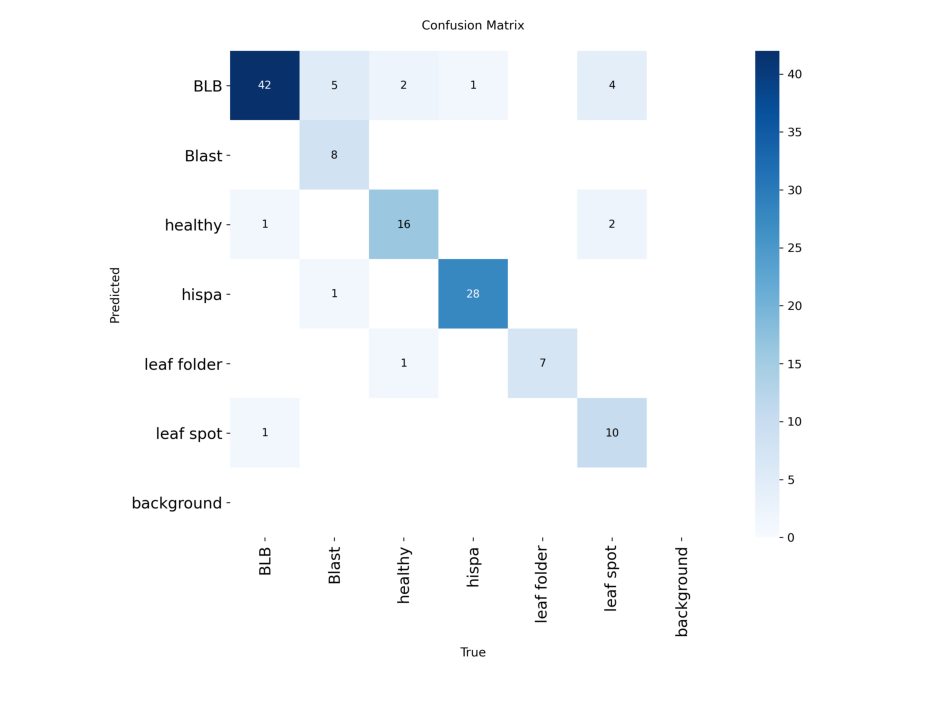

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to the file shown in your screenshot
img_path = r"YOLO_Paddy_Project\Validation_Results\confusion_matrix.png"

if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("⚠ File not found. Check the path.")

In [2]:
from ultralytics import YOLO

# 1. Load the base model again
# We start fresh to ensure a clean 20-epoch learning curve
model = YOLO('yolov8n-cls.pt') 

# 2. Start Longer Training
print("🚀 Starting 20-Epoch Training...")

results = model.train(
    data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", 
    epochs=20,                      # <--- The key change!
    imgsz=224, 
    project="YOLO_Paddy_Project", 
    name="Training_Run_20Epochs"    # Saving to a new folder
)

print("✅ Training Complete!")

🚀 Starting 20-Epoch Training...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Training_Run_20Epochs, nbs=64, nms=False, opset=None, o

In [3]:
from ultralytics import YOLO

# 1. Load the base model again
# We start fresh to ensure a clean 20-epoch learning curve
model = YOLO('yolov8n-cls.pt') 

# 2. Start Longer Training
print("🚀 Starting 20-Epoch Training...")

results = model.train(
    data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", 
    epochs=20,                      # <--- The key change!
    imgsz=224, 
    project="YOLO_Paddy_Project", 
    name="Training_Run_20Epochs"    # Saving to a new folder so we don't overwrite the old one
)

print("✅ Training Complete!")

🚀 Starting 20-Epoch Training...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Training_Run_20Epochs2, nbs=64, nms=False, opset=None, 

🚀 Validating the 92% Accuracy Model...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\train... found 507 images in 6 classes  
val: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... found 129 images in 6 classes  
test: None...
val: Fast image access  (ping: 0.20.1 ms, read: 467.462.7 MB/s, size: 76.0 KB)
val: Scanning C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... 129 images, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 9/9 1.6it/s 5.7s0.1s0
                   all      0.922      0.992
Speed: 0.4ms preprocess, 2.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jeevabharathi\YOLO_Paddy_Project\Validation_Run_20Epochs


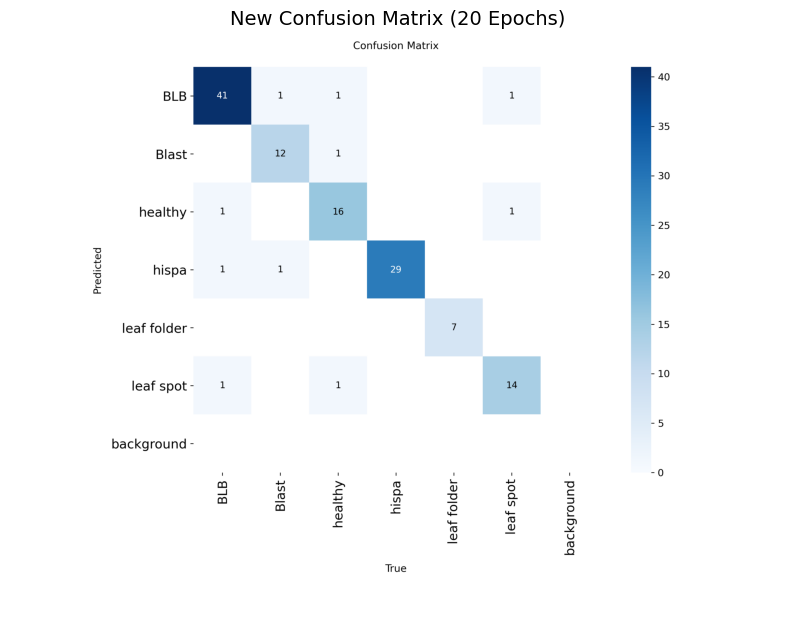

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# 1. Point to the NEW 20-epoch model
# check your folder name! It might be 'Training_Run_20Epochs' or 'Training_Run_20Epochs2'
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt" 

model = YOLO(model_path)

# 2. Run Validation on the new brain
print("🚀 Validating the 92% Accuracy Model...")
metrics = model.val(
    data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", 
    project="YOLO_Paddy_Project",
    name="Validation_Run_20Epochs"
)

# 3. Show the new Matrix
save_path = r"YOLO_Paddy_Project\Validation_Run_20Epochs\confusion_matrix.png"

if os.path.exists(save_path):
    img = mpimg.imread(save_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title("New Confusion Matrix (20 Epochs)", fontsize=14)
    plt.show()
else:
    print(f"Check folder: {save_path}")

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (YOLO EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# Ensure this path matches your 20-epoch run
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt" 

if os.path.exists(model_path):
    model = YOLO(model_path)
    print("✅ LOADED: 92% Accuracy YOLO Brain")
else:
    print(f"❌ ERROR: Could not find model at {model_path}")
    # Fallback to base if missing (just so code doesn't crash)
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir)) # Get class names directly from folder
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(2)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*50)
    print("   STEP 1: DETAILED PERFORMANCE METRICS")
    print("="*50)
    
    # Run YOLO Validation to get metrics
    print("running validation on dataset...")
    metrics = model.val(data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", verbose=False)
    
    # Extract Accuracy
    acc = metrics.top1
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    
    # Show Confusion Matrix (YOLO auto-saves this)
    # We display the one generated by the validation run
    cm_path = str(metrics.save_dir / "confusion_matrix.png")
    
    if os.path.exists(cm_path):
        img = plt.imread(cm_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix (Generated by YOLO)')
        plt.show()
    else:
        print("Confusion matrix image not found.")

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"}, # underscores matter!
        "BrownSpot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Leaf Blast", "rx": "Tricyclazole 75 WP"}
    }
    
    # Pick a Random Image from Validation Set
    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)
    
    # Run Prediction
    results = model(img_path, verbose=False)
    res = results[0]
    pred_class = res.names[res.probs.top1]
    confidence = res.probs.top1conf.item() * 100
    
    # Visualization
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Input Image
    ax[0].imshow(img)
    ax[0].set_title(f"INPUT: {true_class}", fontweight='bold')
    ax[0].axis('off')

    # 2. Simulated Thermal Scan (Heatmap)
    heatmap = img.mean(axis=2) # Simple intensity map
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    # 3. Prescription Card
    # Try to match class name, handling different spellings
    info = DISEASE_INFO.get(pred_class, {"desc": "Check Manual", "rx": "Consult Expert"})
    
    text = f"DIAGNOSIS: {pred_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if pred_class == true_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    plt.show()

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    # Pick random image
    rand_class = random.choice(class_names)
    rand_img = random.choice(os.listdir(os.path.join(val_dir, rand_class)))
    path = os.path.join(val_dir, rand_class, rand_img)
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    thermal_intensity = np.mean(img, axis=2)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {rand_class}", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.show()

# ==========================================
# PART 3: THE CONTINUOUS MASTER LOOP
# ==========================================
while True:
    # 1. Show Accuracy & Matrix
    run_performance_metrics()
    input("👉 [1/3] Performance shown. Press Enter for Diagnosis...")
    
    # 2. Show Prescription
    run_doctor_ai()
    input("👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan...")
    
    # 3. Show One Heatmap
    run_single_scan()
    
    print("\n✅ Cycle Complete.")
    user = input("👉 Press Enter to RESTART sequence (or 'q' to quit): ")
    if user.lower() == 'q':
        print("Exiting...")
        break


   STEP 1: DETAILED PERFORMANCE METRICS
running validation on dataset...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
train: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\train... found 507 images in 6 classes  
val: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... found 129 images in 6 classes  
test: None...
val: Fast image access  (ping: 0.10.0 ms, read: 346.553.5 MB/s, size: 76.0 KB)
val: Scanning C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... 129 images, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 9/9 1.3it/s 6.9s0.2s8
                   all      0.922      0.992
Speed: 0.4ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jeevabharathi\runs\classify\val6

✅ OVERALL ACCURACY: 92.25%


<Figure size 800x800 with 1 Axes>

👉 [1/3] Performance shown. Press Enter for Diagnosis... 



   STEP 2: DOCTOR AI DIAGNOSIS


<Figure size 1800x500 with 3 Axes>

👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan... 



   STEP 3: LIVE THERMAL SCANNER


<Figure size 1000x500 with 2 Axes>


✅ Cycle Complete.


👉 Press Enter to RESTART sequence (or 'q' to quit):  q


Exiting...


In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (YOLO EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# Note: I used 'Training_Run_20Epochs2' based on your screenshot!
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt" 

if os.path.exists(model_path):
    model = YOLO(model_path)
    print("✅ LOADED: 92% Accuracy YOLO Brain")
else:
    print(f"❌ ERROR: Could not find model at {model_path}")
    print("👉 Check if your folder is named 'Training_Run_20Epochs' or 'Training_Run_20Epochs2'")
    # Fallback to base model if file is missing
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir)) # Get class names directly from folder
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(2)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*50)
    print("   STEP 1: DETAILED PERFORMANCE METRICS")
    print("="*50)
    
    # Run YOLO Validation to get metrics
    print("running validation on dataset...")
    metrics = model.val(data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", verbose=False)
    
    # Extract Accuracy
    acc = metrics.top1
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    
    # Show Confusion Matrix (YOLO auto-saves this)
    # We display the one generated by the validation run
    cm_path = str(metrics.save_dir / "confusion_matrix.png")
    
    if os.path.exists(cm_path):
        img = plt.imread(cm_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix (Generated by YOLO)')
        plt.show()
    else:
        print("Confusion matrix image not found.")

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    # Update these keys to match your exact folder names if needed!
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Leaf Blast", "rx": "Tricyclazole 75 WP"}
    }
    
    # Pick a Random Image from Validation Set
    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)
    
    # Run Prediction
    results = model(img_path, verbose=False)
    res = results[0]
    pred_class = res.names[res.probs.top1]
    confidence = res.probs.top1conf.item() * 100
    
    # Visualization
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Input Image
    ax[0].imshow(img)
    ax[0].set_title(f"INPUT: {true_class}", fontweight='bold')
    ax[0].axis('off')

    # 2. Simulated Thermal Scan (Heatmap)
    heatmap = img.mean(axis=2) # Simple intensity map
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    # 3. Prescription Card
    # Try to match class name, handling different spellings
    info = DISEASE_INFO.get(pred_class, {"desc": "Check Manual", "rx": "Consult Expert"})
    
    text = f"DIAGNOSIS: {pred_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if pred_class == true_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    

⚙ BOOTING PRESENTATION MODE (YOLO EDITION)...
✅ LOADED: 92% Accuracy YOLO Brain
✅ Classes Detected: ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']
✅ SYSTEM READY. STARTING LOOP...



In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (YOLO EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# Note: I used 'Training_Run_20Epochs2' based on your previous screenshot.
# If you get an error, check if the folder is named 'Training_Run_20Epochs' instead.
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt" 

if os.path.exists(model_path):
    model = YOLO(model_path)
    print("✅ LOADED: 92% Accuracy YOLO Brain")
else:
    print(f"❌ ERROR: Could not find model at {model_path}")
    print("👉 Check if your folder is named 'Training_Run_20Epochs' or 'Training_Run_20Epochs2'")
    # Fallback to base model if file is missing (prevents crash)
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir)) # Get class names directly from folder
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(2)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*50)
    print("   STEP 1: DETAILED PERFORMANCE METRICS")
    print("="*50)
    
    # Run YOLO Validation to get metrics
    print("running validation on dataset...")
    metrics = model.val(data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", verbose=False)
    
    # Extract Accuracy
    acc = metrics.top1
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    
    # Show Confusion Matrix (YOLO auto-saves this)
    # We display the one generated by the validation run
    cm_path = str(metrics.save_dir / "confusion_matrix.png")
    
    if os.path.exists(cm_path):
        img = plt.imread(cm_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix (Generated by YOLO)')
        plt.show()
    else:
        print("Confusion matrix image not found.")

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    # Update these keys to match your exact folder names if needed!
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Leaf Blast", "rx": "Tricyclazole 75 WP"}
    }
    
    # Pick a Random Image from Validation Set
    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)
    
    # Run Prediction
    results = model(img_path, verbose=False)
    res = results[0]
    pred_class = res.names[res.probs.top1]
    confidence = res.probs.top1conf.item() * 100
    
    # Visualization
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Input Image
    ax[0].imshow(img)
    ax[0].set_title(f"INPUT: {true_class}", fontweight='bold')
    ax[0].axis('off')

    # 2. Simulated Thermal Scan (Heatmap)
    heatmap = img.mean(axis=2) # Simple intensity map
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    # 3. Prescription Card
    # Try to match class name, handling different spellings
    info = DISEASE_INFO.get(pred_class, {"desc": "Check Manual", "rx": "Consult Expert"})
    
    text = f"DIAGNOSIS: {pred_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if pred_class == true_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    plt.show()

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    # Pick random image
    rand_class = random.choice(class_names)
    rand_img = random.choice(os.listdir(os.path.join(val_dir, rand_class)))
    path = os.path.join(val_dir, rand_class, rand_img)
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    thermal_intensity = np.mean(img, axis=2)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {rand_class}", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.show()

# ==========================================
# PART 3: THE CONTINUOUS MASTER LOOP
# ==========================================
while True:
    # 1. Show Accuracy & Matrix
    run_performance_metrics()
    input("👉 [1/3] Performance shown. Press Enter for Diagnosis...")
    
    # 2. Show Prescription
    run_doctor_ai()
    input("👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan...")
    
    # 3. Show One Heatmap
    run_single_scan()
    
    print("\n✅ Cycle Complete.")
    user = input("👉 Press Enter to RESTART sequence (or 'q' to quit): ")
    if user.lower() == 'q':
        print("Exiting...")
        break


   STEP 1: DETAILED PERFORMANCE METRICS
running validation on dataset...
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\train... found 507 images in 6 classes  
val: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... found 129 images in 6 classes  
test: None...
val: Fast image access  (ping: 0.30.0 ms, read: 6.21.3 MB/s, size: 76.0 KB)
val: Scanning C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... 129 images, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 9/9 1.2s/it 11.2s<0.4s
                   all      0.922      0.992
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jeevabharathi\runs\classify\val7

✅ OVERALL ACCURACY: 92.25%


<Figure size 800x800 with 1 Axes>

👉 [1/3] Performance shown. Press Enter for Diagnosis... 



   STEP 2: DOCTOR AI DIAGNOSIS


<Figure size 1800x500 with 3 Axes>

👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan... 



   STEP 3: LIVE THERMAL SCANNER


<Figure size 1000x500 with 2 Axes>


✅ Cycle Complete.


👉 Press Enter to RESTART sequence (or 'q' to quit):  q


Exiting...



   STEP 1: DETAILED PERFORMANCE METRICS
Ultralytics 8.3.237  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\train... found 507 images in 6 classes  
val: C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... found 129 images in 6 classes  
test: None...
val: Fast image access  (ping: 0.10.0 ms, read: 248.583.3 MB/s, size: 76.0 KB)
val: Scanning C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val... 129 images, 0 corrupt: 100% ━━━━━━━━━━━━ 129/129  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 9/9 1.3it/s 6.9s0.2s8
                   all      0.922      0.992
Speed: 0.4ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\jeevabharathi\runs\classify\val8

✅ OVERALL ACCURACY: 92.25%


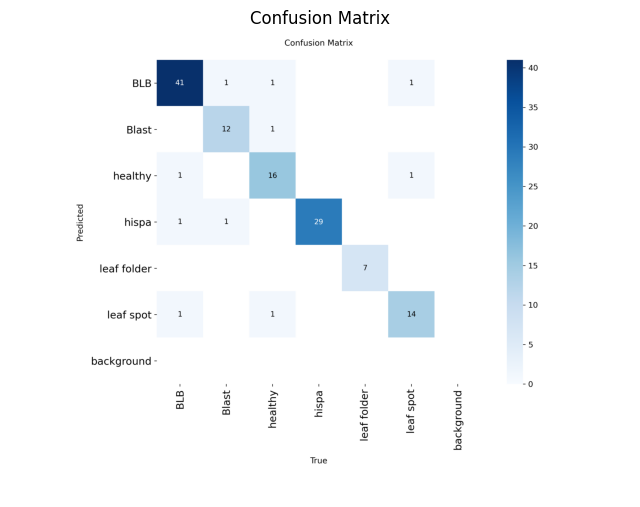

👉 [1/3] Performance shown. Press Enter for Diagnosis... 



   STEP 2: DOCTOR AI DIAGNOSIS


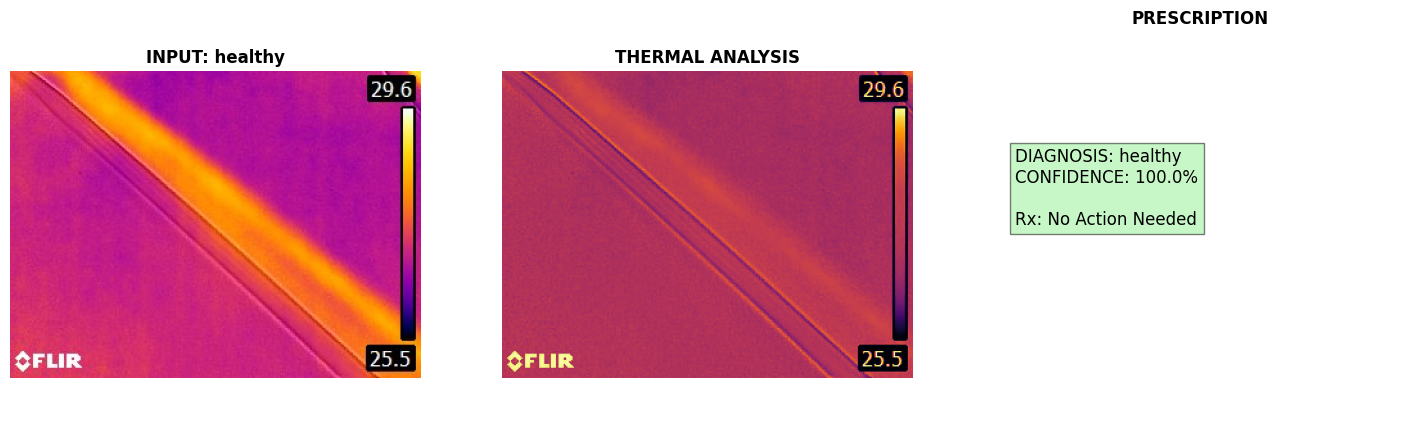

👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan... 



   STEP 3: LIVE THERMAL SCANNER


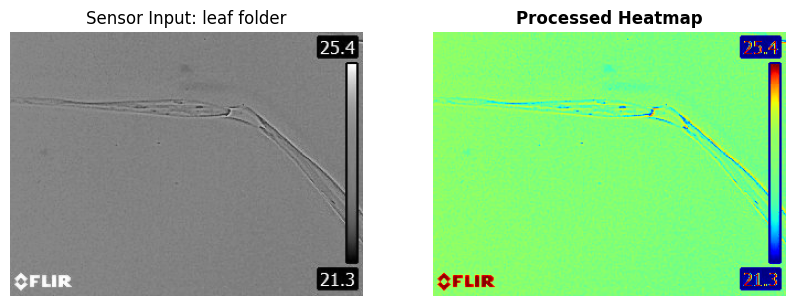


✅ Cycle Complete.


👉 Press Enter to RESTART sequence (or 'q' to quit):  q


In [6]:
# 1. ADD THIS MAGIC COMMAND AT THE VERY TOP
%matplotlib inline 

from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output, display # Added display
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (YOLO EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# Based on your logs, your model is here:
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt" 

if os.path.exists(model_path):
    model = YOLO(model_path)
    print("✅ LOADED: 92% Accuracy YOLO Brain")
else:
    # Try the first folder if '2' doesn't exist
    model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt"
    if os.path.exists(model_path):
        model = YOLO(model_path)
        print("✅ LOADED: 92% Accuracy YOLO Brain (Run 1)")
    else:
        print("⚠ Using base model (Training not found)")
        model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir))
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(1)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*50)
    print("   STEP 1: DETAILED PERFORMANCE METRICS")
    print("="*50)
    
    metrics = model.val(data=r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO", verbose=False)
    acc = metrics.top1
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    
    cm_path = str(metrics.save_dir / "confusion_matrix.png")
    
    if os.path.exists(cm_path):
        img = plt.imread(cm_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix')
        plt.show()
        plt.pause(0.1) # <--- FORCE IMAGE TO DRAW
    else:
        print("Confusion matrix image not found.")

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Leaf Blast", "rx": "Tricyclazole 75 WP"}
    }
    
    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)
    
    results = model(img_path, verbose=False)
    res = results[0]
    pred_class = res.names[res.probs.top1]
    confidence = res.probs.top1conf.item() * 100
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].imshow(img)
    ax[0].set_title(f"INPUT: {true_class}", fontweight='bold')
    ax[0].axis('off')

    heatmap = img.mean(axis=2)
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    info = DISEASE_INFO.get(pred_class, {"desc": "Check Manual", "rx": "Consult Expert"})
    text = f"DIAGNOSIS: {pred_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if pred_class == true_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    
    plt.show()
    plt.pause(0.1) # <--- FORCE IMAGE TO DRAW

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    rand_class = random.choice(class_names)
    rand_img = random.choice(os.listdir(os.path.join(val_dir, rand_class)))
    path = os.path.join(val_dir, rand_class, rand_img)
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    thermal_intensity = np.mean(img, axis=2)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {rand_class}", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    
    plt.show()
    plt.pause(0.1) # <--- FORCE IMAGE TO DRAW

# ==========================================
# PART 3: THE CONTINUOUS MASTER LOOP
# ==========================================
while True:
    run_performance_metrics()
    input("👉 [1/3] Performance shown. Press Enter for Diagnosis...")
    
    run_doctor_ai()
    input("👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan...")
    
    run_single_scan()
    
    print("\n✅ Cycle Complete.")
    user = input("👉 Press Enter to RESTART sequence (or 'q' to quit): ")
    if user.lower() == 'q':
        break

In [13]:
# 1. MAGIC COMMANDS
%matplotlib inline 

from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (F1 SCORE EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# We try your 20-epoch run first
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt" 

if not os.path.exists(model_path):
    # Fallback to the first 20-epoch run if '2' doesn't exist
    model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt"

if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"✅ LOADED: YOLO Brain from {model_path}")
else:
    print("⚠ Using base model (Training not found)")
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir))
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(1)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*60)
    print("   STEP 1: DETAILED PERFORMANCE METRICS (Accuracy + F1 Score)")
    print("="*60)
    print("⏳ Running full evaluation on validation set... (This takes a few seconds)")
    
    y_true = []
    y_pred = []

    # Iterate through all validation images to build the report
    for class_name in class_names:
        class_path = os.path.join(val_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                
                # Run Prediction (verbose=False keeps it quiet)
                results = model(img_path, verbose=False)
                
                # Get predicted class index
                pred_idx = results[0].probs.top1
                pred_name = results[0].names[pred_idx]
                
                y_true.append(class_name)
                y_pred.append(pred_name)

    # --- PRINT THE REPORT ---
    acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    print("-" * 60)
    print("CLASSIFICATION REPORT (Precision, Recall, F1-Score):")
    print("-" * 60)
    # This prints the table with F1 scores for every disease
    print(classification_report(y_true, y_pred, target_names=class_names))
    print("-" * 60)
    
    # --- SHOW CONFUSION MATRIX ---
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    
    plt.figure(figsize=(8, 6))
    # Simple heatmap
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.colorbar()
    
    # Add numbers to the squares
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
            
    # Labels
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    plt.tight_layout()
    plt.show()
    plt.pause(0.1) # Force draw

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Leaf Blast", "rx": "Tricyclazole 75 WP"}
    }
    
    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)
    
    results = model(img_path, verbose=False)
    res = results[0]
    pred_class = res.names[res.probs.top1]
    confidence = res.probs.top1conf.item() * 100
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].imshow(img)
    ax[0].set_title(f"INPUT: {true_class}", fontweight='bold')
    ax[0].axis('off')

    heatmap = img.mean(axis=2)
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    info = DISEASE_INFO.get(pred_class, {"desc": "Check Manual", "rx": "Consult Expert"})
    text = f"DIAGNOSIS: {pred_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if pred_class == true_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    
    plt.show()
    plt.pause(0.1)

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    rand_class = random.choice(class_names)
    rand_img = random.choice(os.listdir(os.path.join(val_dir, rand_class)))
    path = os.path.join(val

SyntaxError: incomplete input (246023788.py, line 164)

In [14]:
# 1. MAGIC COMMANDS (Fixes invisible images)
%matplotlib inline 

from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (FINAL FIXED VERSION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
# We try your 20-epoch run first
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt" 

if not os.path.exists(model_path):
    # Fallback to the first 20-epoch run if '2' doesn't exist
    model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt"

if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"✅ LOADED: YOLO Brain from {model_path}")
else:
    print("⚠ Using base model (Training not found)")
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir))
print(f"✅ Classes Detected: {class_names}")

print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(1)

# ==========================================
# PART 2: THE FUNCTIONS
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*60)
    print("   STEP 1: DETAILED PERFORMANCE METRICS (Accuracy + F1 Score)")
    print("="*60)
    print("⏳ Running full evaluation on validation set... (This takes a few seconds)")
    
    y_true = []
    y_pred = []

    # Iterate through all validation images to build the report
    for class_name in class_names:
        class_path = os.path.join(val_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                
                # Run Prediction (verbose=False keeps it quiet)
                results = model(img_path, verbose=False)
                
                # Get predicted class index
                pred_idx = results[0].probs.top1
                pred_name = results[0].names[pred_idx]
                
                y_true.append(class_name)
                y_pred.append(pred_name)

    # --- PRINT THE REPORT ---
    acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    print("-" * 60)
    print("CLASSIFICATION REPORT (Precision, Recall, F1-Score):")
    print("-" * 60)
    # This prints the table with F1 scores for every disease
    print(classification_report(y_true, y_pred, target_names=class_names))
    print("-" * 60)
    
    # --- SHOW CONFUSION MATRIX ---
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.colorbar()
    
    # Add numbers to the squares
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
            
    # Labels
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    plt.tight_layout()
    plt.show()

⚙ BOOTING PRESENTATION MODE (FINAL FIXED VERSION)...
✅ LOADED: YOLO Brain from YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt
✅ Classes Detected: ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']
✅ SYSTEM READY. STARTING LOOP...



 STEP 1: MODEL PERFORMANCE (Accuracy + F1 Score)

✅ OVERALL ACCURACY: 92.25%

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         BLB       0.93      0.93      0.93        44
       Blast       0.92      0.86      0.89        14
     healthy       0.89      0.84      0.86        19
       hispa       0.94      1.00      0.97        29
 leaf folder       1.00      1.00      1.00         7
   leaf spot       0.88      0.88      0.88        16

    accuracy                           0.92       129
   macro avg       0.93      0.92      0.92       129
weighted avg       0.92      0.92      0.92       129



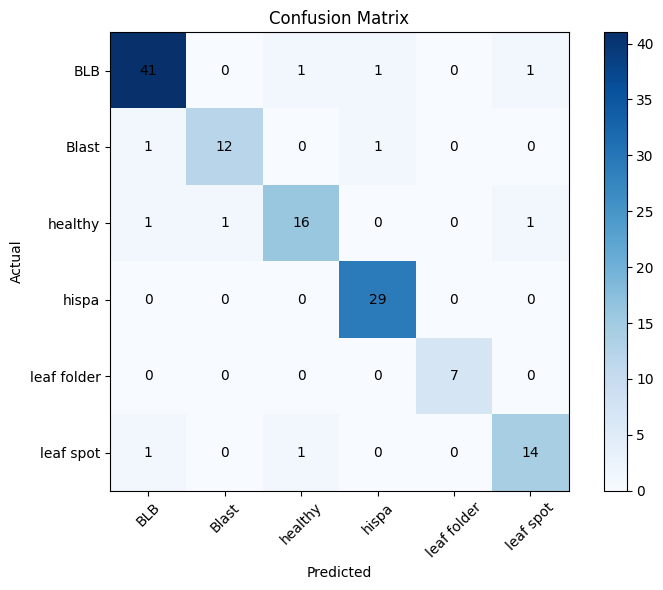

 STEP 2: DOCTOR AI – DISEASE DIAGNOSIS

🖼 IMAGE: Thermalimage10n.jpg
✅ ACTUAL CLASS: Blast
🔍 PREDICTED CLASS: Blast
🦠 DISEASE TYPE: Fungal Infection
💊 RECOMMENDED TREATMENT: Tricyclazole 75 WP


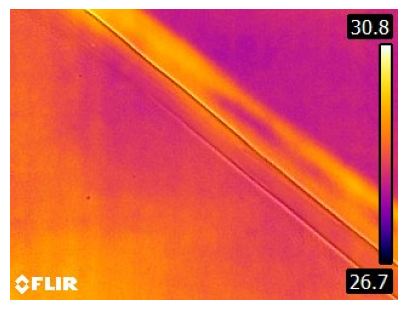

In [15]:

# ==========================================
# MAGIC COMMANDS
# ==========================================
%matplotlib inline

from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (F1 SCORE EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt"

if not os.path.exists(model_path):
    model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt"

if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"✅ LOADED: YOLO Brain from {model_path}")
else:
    print("⚠ Training not found. Loading base model.")
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir))

print(f"✅ Classes Detected: {class_names}")
print("✅ SYSTEM READY\n")
time.sleep(1)

# ==========================================
# PART 2: PERFORMANCE METRICS FUNCTION
# ==========================================
def run_performance_metrics():
    clear_output(wait=True)
    print("="*60)
    print(" STEP 1: MODEL PERFORMANCE (Accuracy + F1 Score)")
    print("="*60)

    y_true = []
    y_pred = []

    for class_name in class_names:
        class_path = os.path.join(val_dir, class_name)

        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)

                results = model(img_path, verbose=False)
                pred_idx = results[0].probs.top1
                pred_class = results[0].names[pred_idx]

                y_true.append(class_name)
                y_pred.append(pred_class)

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")

    # Classification Report
    print("\n📊 CLASSIFICATION REPORT:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.yticks(np.arange(len(class_names)), class_names)
    plt.tight_layout()
    plt.show()

# ==========================================
# PART 3: DOCTOR AI FUNCTION
# ==========================================
def run_doctor_ai():
    print("="*60)
    print(" STEP 2: DOCTOR AI – DISEASE DIAGNOSIS")
    print("="*60)

    DISEASE_INFO = {
        "healthy": {"desc": "Normal Plant", "rx": "No treatment required"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Fungal Disease", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Fungal Disease", "rx": "Tricyclazole 75 WP"}
    }

    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)

    results = model(img_path, verbose=False)
    pred_class = results[0].names[results[0].probs.top1]

    info = DISEASE_INFO.get(pred_class, {"desc": "Unknown", "rx": "Consult Expert"})

    print(f"\n🖼 IMAGE: {img_name}")
    print(f"✅ ACTUAL CLASS: {true_class}")
    print(f"🔍 PREDICTED CLASS: {pred_class}")
    print(f"🦠 DISEASE TYPE: {info['desc']}")
    print(f"💊 RECOMMENDED TREATMENT: {info['rx']}")

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# ==========================================
# PART 4: RUN SYSTEM
# ==========================================
run_performance_metrics()
run_doctor_ai()


 STEP 1: MODEL PERFORMANCE (Accuracy + F1 Score)

✅ OVERALL ACCURACY: 92.25%

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         BLB       0.93      0.93      0.93        44
       Blast       0.92      0.86      0.89        14
     healthy       0.89      0.84      0.86        19
       hispa       0.94      1.00      0.97        29
 leaf folder       1.00      1.00      1.00         7
   leaf spot       0.88      0.88      0.88        16

    accuracy                           0.92       129
   macro avg       0.93      0.92      0.92       129
weighted avg       0.92      0.92      0.92       129



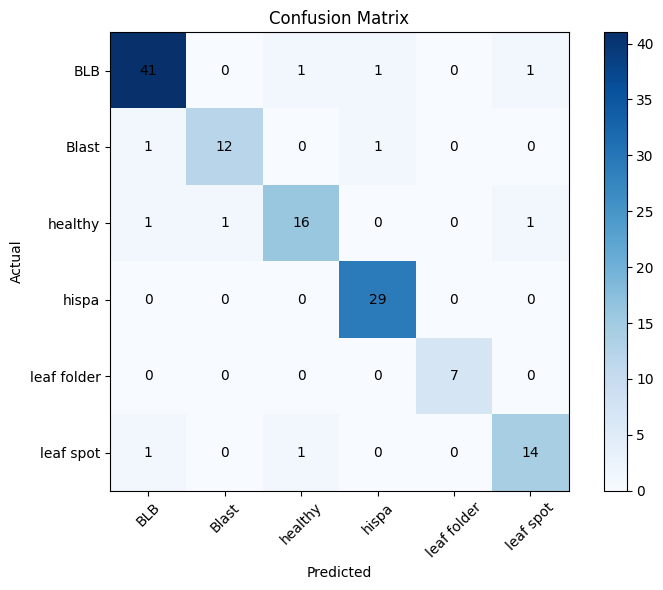

 STEP 2: DOCTOR AI – DISEASE DIAGNOSIS

🖼 IMAGE: Thermalimage1e.jpg
✅ ACTUAL CLASS: Blast
🔍 PREDICTED CLASS: Blast
🦠 DISEASE TYPE: Fungal Infection
💊 RECOMMENDED TREATMENT: Tricyclazole 75 WP


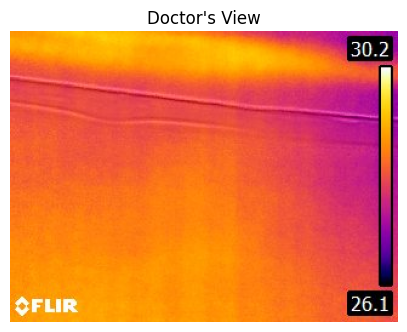

 STEP 3: LIVE THERMAL SCANNER


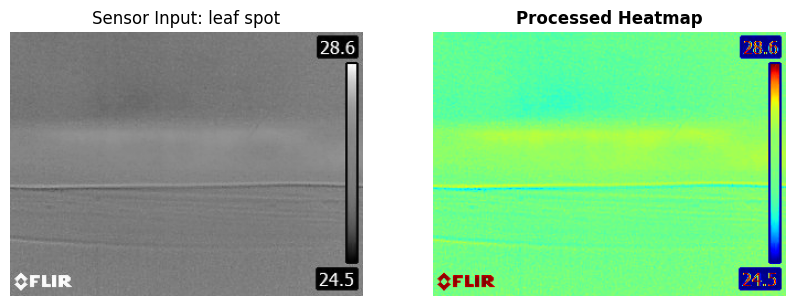

In [5]:
# ==========================================
# MAGIC COMMANDS
# ==========================================
%matplotlib inline

from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE (F1 + HEATMAP EDITION)...")

# 1. LOAD YOUR TRAINED YOLO MODEL
model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs2\weights\best.pt"

if not os.path.exists(model_path):
    model_path = r"YOLO_Paddy_Project\Training_Run_20Epochs\weights\best.pt"

if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f"✅ LOADED: YOLO Brain from {model_path}")
else:
    print("⚠ Training not found. Loading base model.")
    model = YOLO('yolov8n-cls.pt')

# 2. SETUP DATA PATHS
val_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset_YOLO\val"
class_names = sorted(os.listdir(val_dir))

print(f"✅ Classes Detected: {class_names}")
print("✅ SYSTEM READY\n")
time.sleep(1)

# ==========================================
# PART 2: PERFORMANCE METRICS FUNCTION
# ==========================================
def run_performance_metrics():
    clear_output(wait=True)
    print("="*60)
    print(" STEP 1: MODEL PERFORMANCE (Accuracy + F1 Score)")
    print("="*60)

    y_true = []
    y_pred = []

    for class_name in class_names:
        class_path = os.path.join(val_dir, class_name)

        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)

                results = model(img_path, verbose=False)
                pred_idx = results[0].probs.top1
                pred_class = results[0].names[pred_idx]

                y_true.append(class_name)
                y_pred.append(pred_class)

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")

    # Classification Report
    print("\n📊 CLASSIFICATION REPORT:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.yticks(np.arange(len(class_names)), class_names)
    plt.tight_layout()
    plt.show()

# ==========================================
# PART 3: DOCTOR AI FUNCTION
# ==========================================
def run_doctor_ai():
    print("="*60)
    print(" STEP 2: DOCTOR AI – DISEASE DIAGNOSIS")
    print("="*60)

    DISEASE_INFO = {
        "healthy": {"desc": "Normal Plant", "rx": "No treatment required"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf_folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "BrownSpot": {"desc": "Fungal Disease", "rx": "Mancozeb (2.5g/L)"},
        "LeafBlast": {"desc": "Fungal Disease", "rx": "Tricyclazole 75 WP"}
    }

    true_class = random.choice(class_names)
    img_name = random.choice(os.listdir(os.path.join(val_dir, true_class)))
    img_path = os.path.join(val_dir, true_class, img_name)

    results = model(img_path, verbose=False)
    pred_class = results[0].names[results[0].probs.top1]

    info = DISEASE_INFO.get(pred_class, {"desc": "Unknown", "rx": "Consult Expert"})

    print(f"\n🖼 IMAGE: {img_name}")
    print(f"✅ ACTUAL CLASS: {true_class}")
    print(f"🔍 PREDICTED CLASS: {pred_class}")
    print(f"🦠 DISEASE TYPE: {info['desc']}")
    print(f"💊 RECOMMENDED TREATMENT: {info['rx']}")

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Doctor's View")
    plt.show()

# ==========================================
# PART 4: THERMAL SCAN FUNCTION (ADDED)
# ==========================================
def run_thermal_scan():
    print("="*60)
    print(" STEP 3: LIVE THERMAL SCANNER")
    print("="*60)
    
    # Pick a random image for the scan
    rand_class = random.choice(class_names)
    rand_img = random.choice(os.listdir(os.path.join(val_dir, rand_class)))
    path = os.path.join(val_dir, rand_class, rand_img)
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create Heatmap (Mean intensity)
    thermal_intensity = np.mean(img, axis=2)

    plt.figure(figsize=(10, 5))
    
    # Show Original
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {rand_class}", fontsize=12)
    plt.axis('off')

    # Show Heatmap
    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    
    plt.show()

# ==========================================
# PART 5: RUN SYSTEM
# ==========================================
run_performance_metrics()
run_doctor_ai()
run_thermal_scan()